### A very simple example of call/use of *GISCO* web-services...

Let us run a very simple example using the [**`happyGISCO`**](https://github.com/eurostat/happyGISCO) module. One can refer anytime to the documentation available at this address:  http://happygisco.readthedocs.io.

In [1]:
import happygisco
from happygisco import settings, base, services

! missing FASTENERS package (https://pypi.org/project/fasteners/) <class 'ImportWarning'> !
! missing SIMPLEJSON package (https://pypi.python.org/pypi/simplejson/) <class 'ImportWarning'> !
! missing GOOGLEPLACES package (https://github.com/slimkrazy/python-google-places) !


In this notebook, we will also show how the various services can be combined with other useful `Python` modules, _e.g._ [**`gdal`**](https://gdal.org/python/), [**`geopandas`**](https://geopandas.readthedocs.io/en/latest), [**`ipyleaflet`**](https://ipyleaflet.readthedocs.io/en/latest/) or [**`folium`**](https://github.com/python-visualization/folium):

In [2]:
try:
    import gdal # from osgeo import gdal
    import geopandas
    import folium
    import ipyleaflet
except:
    print('!ups...some useful modules are missing!')

We first create an instance of a `GISCO`-based service, namely using the **`services.GISCOService`** class.

In [3]:
serv = services.GISCOService()

In the following, we will use this instance to perform various operations, calling everytim *GISCO* web-services. 

Let us simply define a geolocation by its common name:

In [4]:
whereamI = 'Luxembourg'

We could also have chosen to actually use: `wheramI = "Luxembourg, Luxembourg"`. That is up to us actually...and to the service capability to resolve toponame ambibuity.

One can already simply run the service to retrieve the geographical coordinates of the considered location, since the method `GISCOService.place2coord` can be used for that purpose:

In [5]:
coords = serv.place2coord(whereamI)
coords

[[49.8158683, 6.1296751],
 [49.6047585, 6.142580146666669],
 [48.3777152, 4.2576617],
 [49.6112768, 6.129799]]

Hence, we got this way all the geolocations that *"potentially"* correspond to the name `whereamI`. We can actually decide to retrieve one location instead of all of them, *e.g.* the first one in the list (rather arbitrarly):

In [6]:
coord = serv.place2coord(whereamI, unique=True)
coord

[49.8158683, 6.1296751]

Note that any time, we actually call the *GISCO* geoservice... there is **no caching** of the data fetched through the service!

What if we *"revert"* the geocoding service to identify the name of the location, using the `GISCOService.coord2place` method for that purpose:

In [7]:
serv.coord2place(coord)

'Schieren, 7421, Luxembourg'

Hence, it does not exactly correspond to the input location name... not so surprising. What if we run the same service on the whole collection of all retrieved geographical coordinates:

In [8]:
names = serv.coord2place(coords)
names

['Schieren, 7421, Luxembourg',
 "Rue d'Itzig, Luxembourg, 1118, Luxembourg",
 "Rue de l'Église, Bouy-Luxembourg, (Grand Est), 10220, France",
 'Luxembourg, 2525, Luxembourg']

Hum... note that one of the places retrieved is actually...in France. That's the ambiguity related to the toponame. Note that this issue is actually not solved when passing the country as well (but that is specific to...Luxembourg):

In [9]:
serv.coord2place(serv.place2coord('Luxembourg, Luxembourg'))

['Schieren, 7421, Luxembourg',
 "Rue d'Itzig, Luxembourg, 1118, Luxembourg",
 "Rue de l'Église, Bouy-Luxembourg, (Grand Est), 10220, France",
 'Luxembourg, 2525, Luxembourg']

Note that we can run the service again to retrieve the actual `(Lon,lat)` locations of the toponames above:

In [10]:
serv.place2coord(names, order='Ll', unique=True)

[[6.1239744, 49.8198198],
 [6.1499308, 49.5980238],
 [4.2574905, 48.3761178],
 [6.125268, 49.6180953]]

You could instead use the module `geopandas` when this is available on your local install. The module `geopandas` is actually based on the [**`geopy`**](http://geopy.readthedocs.io/) module (see this [page](https://geopandas.readthedocs.io/en/latest/geocoding.html)), itself available in **`happyGISCO`** through the **`services.APIService`** class. Run for instance the following and compare it with the previous output:

In [11]:
geopandas.tools.geocode(names, provider="nominatim")

,address,geometry
0,"Schieren, Canton Diekirch, Lëtzebuerg",POINT (6.096622 49.8300396)
1,"Rue d'Itzig, Bonnevoie, Luxembourg, Canton Lux...",POINT (6.1499308 49.5980238)
2,"Rue de l'Église, Bouy-Luxembourg, Troyes, Aube...",POINT (4.2574905 48.3761178)
3,"Luxembourg, Canton Luxembourg, Lëtzebuerg",POINT (6.129799 49.6112768)


We can exploit the outputs of the *GISCO* service, `names` and `coords` data, for visualisation. For that purpose, the module `folium`, that actually builds ontop of [**`Leaflet.js`**](https://leafletjs.com) can be used. To render the map in the notebook, we call the *"blue marble"* tiles (one of the [background view services](https://webgate.ec.europa.eu/fpfis/wikis/display/GISCO/Geospatial+information+services+for+the+European+Commission+and+other+EU+users) of *GISCO*) as background. Note the use of the `GISCOService.url_title` method for that purpose. 

In [12]:
tiles, attr = serv.url_tile('bmarble')
map_display = folium.Map(location=coord, tiles=tiles, attr=attr, zoom_start=6)
[folium.Marker(coords[i], popup=folium.Popup('%s' % names[i], parse_html=True)).add_to(map_display) \
     for i in range(len(names))]
map_display

Now you can zoom in/out on the map, check the location designatd by the marker....

We can further use the *GISCO* service to retrieve the *geometry* associated to the location, using the `GISCOService.place2geom` method for that purpose:

In [13]:
serv.place2geom(whereamI)

[{'geometry': {'coordinates': [6.1296751, 49.8158683], 'type': 'Point'},
  'properties': {'country': 'Luxembourg',
   'extent': [5.7357006, 50.1827724, 6.5312481, 49.4478539],
   'name': 'Luxembourg',
   'osm_id': 2171347,
   'osm_key': 'place',
   'osm_type': 'R',
   'osm_value': 'country'},
  'type': 'Feature'},
 {'geometry': {'coordinates': [5.439918625407589, 49.963667], 'type': 'Point'},
  'properties': {'country': 'Belgium',
   'extent': [4.9684415, 50.430377, 6.0344254, 49.4969821],
   'name': 'Luxembourg',
   'osm_id': 1412581,
   'osm_key': 'boundary',
   'osm_type': 'R',
   'osm_value': 'administrative',
   'state': 'Wallonia'},
  'type': 'Feature'},
 {'geometry': {'coordinates': [6.142580146666669, 49.6047585],
   'type': 'Point'},
  'properties': {'country': 'Luxembourg',
   'extent': [5.998434, 49.692307, 6.3096867, 49.516975],
   'name': 'Canton Luxembourg',
   'osm_id': 407824,
   'osm_key': 'place',
   'osm_type': 'R',
   'osm_value': 'county'},
  'type': 'Feature'},
 {

or we are lazy:

In [14]:
area = serv.place2geom(whereamI, unique=True)
area

{'geometry': {'coordinates': [6.1296751, 49.8158683], 'type': 'Point'},
 'properties': {'country': 'Luxembourg',
  'extent': [5.7357006, 50.1827724, 6.5312481, 49.4478539],
  'name': 'Luxembourg',
  'osm_id': 2171347,
  'osm_key': 'place',
  'osm_type': 'R',
  'osm_value': 'country'},
 'type': 'Feature'}

We are more interested in retrieving/identifying the NUTS value, say at level 2, associated to the geolocation. We can use the method `findnuts` for that purpose:

In [15]:
serv.place2nuts(whereamI, level=2)

{'attributes': {'CNTR_CODE': 'LU',
  'LEVL_CODE': '2',
  'NAME_LATN': 'Luxembourg',
  'NUTS_ID': 'LU00',
  'NUTS_NAME': 'Luxembourg',
  'OBJECTID': '333',
  'SHRT_ENGL': 'Luxembourg'},
 'displayFieldName': 'NUTS_ID',
 'layerId': 2,
 'layerName': 'NUTS_2013',
 'value': 'LU00'}

or if we are actually interested in retrieving all the NUTS levels (from 0 to 3):

In [16]:
serv.place2nuts(whereamI)

[{'attributes': {'CNTR_CODE': 'LU',
   'LEVL_CODE': '0',
   'NAME_LATN': 'LUXEMBOURG',
   'NUTS_ID': 'LU',
   'NUTS_NAME': 'LUXEMBOURG',
   'OBJECTID': '20',
   'SHRT_ENGL': 'Luxembourg'},
  'displayFieldName': 'NUTS_ID',
  'layerId': 2,
  'layerName': 'NUTS_2013',
  'value': 'LU'},
 {'attributes': {'CNTR_CODE': 'LU',
   'LEVL_CODE': '1',
   'NAME_LATN': 'LUXEMBOURG',
   'NUTS_ID': 'LU0',
   'NUTS_NAME': 'LUXEMBOURG',
   'OBJECTID': '97',
   'SHRT_ENGL': 'Luxembourg'},
  'displayFieldName': 'NUTS_ID',
  'layerId': 2,
  'layerName': 'NUTS_2013',
  'value': 'LU0'},
 {'attributes': {'CNTR_CODE': 'LU',
   'LEVL_CODE': '2',
   'NAME_LATN': 'Luxembourg',
   'NUTS_ID': 'LU00',
   'NUTS_NAME': 'Luxembourg',
   'OBJECTID': '333',
   'SHRT_ENGL': 'Luxembourg'},
  'displayFieldName': 'NUTS_ID',
  'layerId': 2,
  'layerName': 'NUTS_2013',
  'value': 'LU00'},
 {'attributes': {'CNTR_CODE': 'LU',
   'LEVL_CODE': '3',
   'NAME_LATN': 'Luxembourg',
   'NUTS_ID': 'LU000',
   'NUTS_NAME': 'Luxembourg',
 

Similarly, we could have run the service on the already computed geographical coordinates:

In [17]:
serv.coord2nuts(coord, level=2)

{'attributes': {'CNTR_CODE': 'LU',
  'LEVL_CODE': '2',
  'NAME_LATN': 'Luxembourg',
  'NUTS_ID': 'LU00',
  'NUTS_NAME': 'Luxembourg',
  'OBJECTID': '333',
  'SHRT_ENGL': 'Luxembourg'},
 'displayFieldName': 'NUTS_ID',
 'layerId': 2,
 'layerName': 'NUTS_2013',
 'value': 'LU00'}

Investing more into NUTS, let's use some of the other available services, for instance the `GISCOService.nuts_info` to retrieve the NUTS areas for a given county:

In [18]:
serv.nuts_info(info='UNITS', unit='BE')

['BE',
 'BE1',
 'BE10',
 'BE100',
 'BE2',
 'BE21',
 'BE211',
 'BE212',
 'BE213',
 'BE22',
 'BE221',
 'BE222',
 'BE223',
 'BE23',
 'BE231',
 'BE232',
 'BE233',
 'BE234',
 'BE235',
 'BE236',
 'BE24',
 'BE241',
 'BE242',
 'BE25',
 'BE251',
 'BE252',
 'BE253',
 'BE254',
 'BE255',
 'BE256',
 'BE257',
 'BE258',
 'BE3',
 'BE31',
 'BE310',
 'BE32',
 'BE321',
 'BE322',
 'BE323',
 'BE324',
 'BE325',
 'BE326',
 'BE327',
 'BE33',
 'BE331',
 'BE332',
 'BE334',
 'BE335',
 'BE336',
 'BE34',
 'BE341',
 'BE342',
 'BE343',
 'BE344',
 'BE345',
 'BE35',
 'BE351',
 'BE352',
 'BE353']

but also restricting the search for a given level:

In [19]:
units = serv.nuts_info(info='UNITS', unit='AT', level=2)
units

['AT11', 'AT12', 'AT13', 'AT21', 'AT22', 'AT31', 'AT32', 'AT33', 'AT34']

It is then possible to fetch the responses from _GISCO_ API associated to these areas. One still needs to define some additional parameters regarding the retrieved data:

In [20]:
resp = serv.nuts_response(unit=units, year=2013, scale='20m', vector='region')
resp

{'AT11': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT12': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT13': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT21': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT22': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT31': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT32': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT33': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}, 'AT34': {2013: {4326: {'20m': {'RG': {'geojson': <Response [200]>}}}}}}

This is indeed a nested dictionary structure (from `base._NestedDict` class):

In [21]:
print(type(resp))
print(resp.dimensions)
print(resp.xget(source='AT32'))

<class 'happygisco.base._NestedDict'>
OrderedDict([('source', ['AT11', 'AT12', 'AT13', 'AT21', 'AT22', 'AT31', 'AT32', 'AT33', 'AT34']), ('year', 2013), ('proj', 4326), ('scale', '20m'), ('vector', 'RG'), ('ifmt', 'geojson')])
<Response [200]>


From this response, we can easily retrieve the data themselves, again stored in a nested dictionary structure:

In [22]:
data = serv.nuts_geometry(resp=resp)
type(data) == base._NestedDict

True

which could actually be run directly using a command similar to that use for fetching the response:

In [23]:
data == serv.nuts_geometry(unit=units, year=2013, scale='20m', vector='region')

True

The actual geometries can be extracted from the dictionary easily:

In [24]:
geometries = data.xvalues()
geometries

[{'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'},
   'type': 'name'},
  'features': [{'geometry': {'coordinates': [[[17.1608, 48.00666],
       [17.09466, 47.97087],
       [17.08519, 47.87444],
       [17.00995, 47.85834],
       [17.07445, 47.80826],
       [17.09307, 47.70824],
       [16.74903, 47.68142],
       [16.61229, 47.76023],
       [16.42185, 47.6647],
       [16.65208, 47.6229],
       [16.71451, 47.53963],
       [16.64622, 47.4466],
       [16.44546, 47.40721],
       [16.43376, 47.35292],
       [16.48374, 47.2876],
       [16.41949, 47.19492],
       [16.52933, 47.12723],
       [16.46333, 47.09496],
       [16.52057, 47.05618],
       [16.43888, 47.0297],
       [16.50827, 47.00126],
       [16.30226, 46.99843],
       [16.11385, 46.86907],
       [15.99624, 46.8354],
       [16.12172, 46.99067],
       [16.08651, 47.07421],
       [16.11346, 47.16184],
       [16.01516, 47.36713],
       [16.17177, 47.4224],
       [16.28108, 47.45513],
       [16.3725

Let us display the data using `ipyleaflet` this time:

In [25]:
tile_info = serv.tile_info(tile='osmec')
print(tile_info)
map_display = ipyleaflet.Map(center=tile_info['center'], zoom=tile_info['zoom'])
map_display.add_layer(ipyleaflet.TileLayer(url=tile_info['url'], attribution=tile_info['attr']))
[map_display.add_layer(ipyleaflet.GeoJSON(data=g, hover_style={'fillColor': 'red'})) for g in geometries]
map_display

{'center': [50.033333, 10.35], 'zoom': 4, 'url': 'https://europa.eu/webtools/maps/tiles/osm-ec/{z}/{y}/{x}', 'attr': '© OpenStreetMap'}


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

To enable "interoperability", the geometries can then be parsed into a `geopandas.GeoDataFrame` structure using the following:

In [26]:
gdf = geopandas.GeoDataFrame.from_features([g['features'][0] for g in geometries], crs=geometries[0]['crs'])
gdf.head()

,CNTR_CODE,FID,LEVL_CODE,NUTS_ID,NUTS_NAME,geometry
0,AT,AT11,2,AT11,Burgenland (AT),"POLYGON ((17.1608 48.00666, 17.09466 47.97087,..."
1,AT,AT12,2,AT12,Niederösterreich,"POLYGON ((15.54245 48.9077, 15.75363 48.85218,..."
2,AT,AT13,2,AT13,Wien,"POLYGON ((16.57699 48.14444, 16.2181 48.12807,..."
3,AT,AT21,2,AT21,Kärnten,"POLYGON ((13.35452 47.0971, 13.68654 47.03982,..."
4,AT,AT22,2,AT22,Steiermark,"POLYGON ((15.84701 47.56779, 16.0874 47.50716,..."


The dataframe structure can be plotted directly:

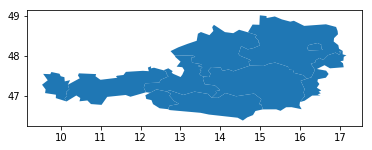

In [27]:
%matplotlib inline
gdf.plot()

Similarly, let's repeat the whole operation when considering all NUTS boundaries over Europe:

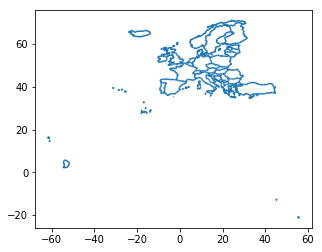

In [28]:
data = serv.nuts_geometry(source='NUTS', year=2016, scale='60m', vector='boundary')
geometries = data.xvalues(_force_list_=True)
gdf = geopandas.GeoDataFrame.from_features(geometries[0], crs=geometries[0]['crs'])
%matplotlib inline
gdf.plot()

That's is folks!